<a href="https://colab.research.google.com/github/laxmangautam/Data-Science-with-python/blob/main/Portfolio_Optimization_Using_GA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Portfolio optimization using Genetic Algorithm

### Background : 
   
   **Portfolio optimization** is one of the most interesting fields of study of financial mathematics. Since the birth of Modern Portfolio Theory (MPT) by Harry Markowitz, many scientists have studied a lot of analytical and numerical methods to build the best investment portfolio according to a defined set of assets. The power of genetic algorithms makes it possible to find the optimal portfolio.
In dealing with this Optimization problem, Harry Markowitz 1959 developed a quantitative model, also called **mean-variance model**. The mean-variance model has been usually considered as either the minimization of an objective function representing the portfolio variance (risk) for a given level of return or the maximization of an objective function representing the portfolio return for a given level of risk.


### Problem Statement: 
   Let’s say we have selected N financial assets we want to invest in. They can be stock, funds, bonds, ETF etc. Each one of them has many historical returns, that is the price relative difference from one period to another. Periods can be days, weeks, months and so on. Build an investment portfolio with a  mix of many assets (They can be stock, funds, bonds, ETF) together allocating a fraction x of total  capital to each one of them. Each fraction is called weight.  The goal of portfolio optimization is to find the values of the weights that Maximize returns and minimize risk simultaneously of our portfolio under some constraints. 

#### Given Data:
Monthly Closing Stock values of AAPL(**Apple**), TSLA(**Tesla**), NKE(**Nike**), GOOGL(**Google**)GE(**General Electric**) and FB(**Facebook**) from May 2015 to till last traded date.

We can add any number of stock it must work. 

### Approach and Tasks:

1. Read the data and combine them into one dataframe.
2. Calculate the historical returns for 3 months, 6 months, 12 months, 24 months and 36 months for each of the stocks.
3. Define **Gene** (Scalar): A fraction of the total capital assigned to a stock.
4. Define **Chromosome** (1D Array): Set of genes i.e. fractions of total capital assigned to each stock.
        Check! Sum of each chromosome should be equal to 1.
5. Generate **Initial Population** (2D Array): A set of randomly generated chromosomes.
6. **Fitness function** (Define a Function): 
The **Sharpe ratio**, S, is a measure for quantifying the performance (Fitness) of the portfolio which works on "Maximisation of return (mean) and minimisation of risk (Variance) simultaneously" and is computed as
follows:
                
                S = (µ − r)/σ
    
    Here µ is the return of the portfolio over a specified period or Mean portfolio return, 
         r is the risk-free rate over the same period and 
         σ is the standard deviation of the returns over the specified period or Standard deviation of portfolio return.

      
    Mean portfolio return = Mean Return * Fractions of Total Capital (Chromosome).
    Risk-free rate = 0.0697 ( as per google)
    Standard deviation of portfolio return = (chromosome * Standard deviation)**2 + Covariance * Respective weights in chromosome.
    
7. Select **Elite Population** (Define a Function): It filters the elite chromosomes which have highest returns, which was calculated in fitness function.
    
8. **Mutation**: A function that will perform mutation in a chromosome. Randomly we shall choose 2 numbers between 0, 5 and those elements we shall swap.

9. Crossover: **Heuristic crossover** or **Blend Crossover** uses the ﬁtness values of two parent chromosomes to ascertain the direction of the search. It moves from worst parent to best parent. 
The oﬀspring are created according to the equation:
            Off_spring A = Best Parent  + β ∗ ( Best Parent − Worst Parent)
            Off_spring B = Worst Parent - β ∗ ( Best Parent − Worst Parent)
                Where β is a random number between 0 and 1.
This crossover type is good for real-valued genomes.

10. **Next Generation** (define a Function): A function which does mutation,mating or crossover based on a probability and builds a new generation of chromosomes.
    
11. **Iterate the process**: Iterate the whole process till their is no change in maximum returns or for fixed number of iterations. 

#### References:
1. https://www.researchgate.net/publication/286952225_A_heuristic_crossover_for_portfolio_selection
2. https://pdfs.semanticscholar.org/9888/061ea3326ff9b41c807ed21f0c10463b7879.pdf
3. https://www.math.kth.se/matstat/seminarier/reports/M-exjobb12/121008.pdf


#### Pre-requisite tasks:

In [32]:
import numpy as np
import pandas as pd
from functools import reduce
from datetime import date, timedelta

In [33]:
import pandas_datareader.data as web

nameOfTheStock = ['AAPL', 'TSLA','NKE','GOOGL','GE','FB']
numberofStuck=  len(nameOfTheStock)

print(nameOfTheStock)
print(numberofStuck)

stockData = web.get_data_yahoo(nameOfTheStock,'04/05/2015',interval='m')
stockData

['AAPL', 'TSLA', 'NKE', 'GOOGL', 'GE', 'FB']
6


Attributes   Adj Close              ...        Volume             
Symbols           AAPL        TSLA  ...            GE           FB
Date                                ...                           
2015-05-01   29.691864   50.160000  ...  6.648897e+08  421870700.0
2015-06-01   28.705923   53.652000  ...  7.266587e+08  537740300.0
2015-07-01   27.760731   53.230000  ...  6.415498e+08  790781000.0
2015-08-01   25.806267   49.812000  ...  8.090572e+08  709884600.0
2015-09-01   25.357531   49.680000  ...  9.659570e+08  635399800.0
...                ...         ...  ...           ...          ...
2021-02-01  120.873756  675.500000  ...  1.244667e+09  317775200.0
2021-03-01  121.942871  667.929993  ...  2.344153e+09  497416700.0
2021-04-01  131.237091  709.440002  ...  1.238608e+09  421247300.0
2021-05-01  126.884476  606.440002  ...  9.370744e+08  294710000.0
2021-05-24  127.099998  606.440002  ...  3.863299e+07   16445356.0

[74 rows x 36 columns]

In [34]:
df = stockData['Adj Close'].reset_index()
df

Symbols,Date,AAPL,TSLA,NKE,GOOGL,GE,FB
0,2015-05-01,29.691864,50.160000,47.583588,545.320007,23.104530,79.190002
1,2015-06-01,28.705923,53.652000,50.693542,540.039978,22.511456,85.769997
2,2015-07-01,27.760731,53.230000,54.072479,657.500000,22.301334,94.010002
3,2015-08-01,25.806267,49.812000,52.444016,647.820007,21.207634,89.430000
4,2015-09-01,25.357531,49.680000,57.709538,638.369995,21.549417,89.900002
...,...,...,...,...,...,...,...
69,2021-02-01,120.873756,675.500000,134.506531,2021.910034,12.530759,257.619995
70,2021-03-01,121.942871,667.929993,132.889999,2062.520020,13.120325,294.529999
71,2021-04-01,131.237091,709.440002,132.619995,2353.500000,13.120000,325.079987
72,2021-05-01,126.884476,606.440002,134.059998,2361.040039,13.180000,324.630005


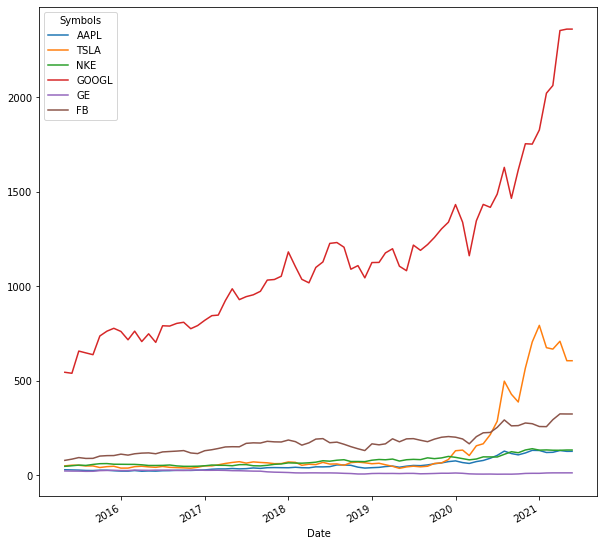

In [35]:
df.plot(0,figsize=(10, 10))

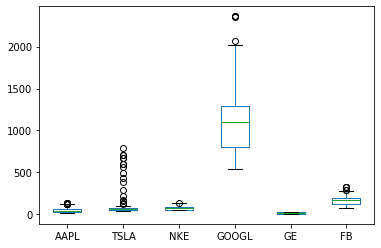

In [36]:
df.plot.box()

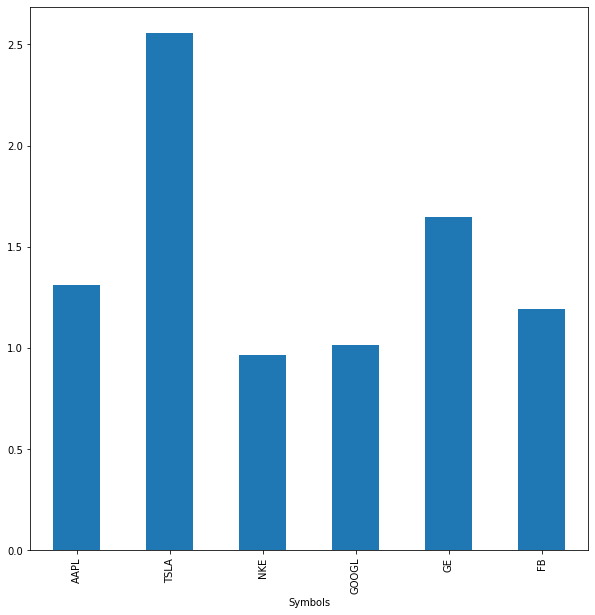

In [37]:
# approc 250 trading days in one years 
# Standard deviation is the statistical measure of market volatility. 
# Measuring how widely prices are dispersed from the average price. 
# If prices trade in a narrow trading range, the standard deviation will return a low value that indicates low volatility.
df.iloc[:,-6:].pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250)).plot(kind='bar', figsize=(10, 10))

# Task #1:
#### Read the data and combine them into one dataframe.

In [39]:
stocks = df.copy()
stocks = df.sort_index(axis=0 ,ascending=False).reset_index(drop=True)
stocks.head(20)

Symbols,Date,AAPL,TSLA,NKE,GOOGL,GE,FB
0,2021-05-24,127.099998,606.440002,134.059998,2361.040039,13.180000,324.630005
1,2021-05-01,126.884476,606.440002,134.059998,2361.040039,13.180000,324.630005
2,2021-04-01,131.237091,709.440002,132.619995,2353.500000,13.120000,325.079987
3,2021-03-01,121.942871,667.929993,132.889999,2062.520020,13.120325,294.529999
4,2021-02-01,120.873756,675.500000,134.506531,2021.910034,12.530759,257.619995
5,2021-01-01,131.539673,793.530029,133.318954,1827.359985,10.672131,258.329987
6,2020-12-01,132.267349,705.669983,140.899490,1752.640015,10.782123,273.160004
7,2020-11-01,118.466408,567.599976,134.156784,1754.400024,10.163149,276.970001
8,2020-10-01,108.326363,388.040009,119.595741,1616.109985,7.407717,263.109985
9,2020-09-01,115.242294,429.010010,125.033722,1465.599976,6.209424,261.899994


# Task #2:
#### Calculate the historical returns for 3 months, 6 months, 12 months, 24,  months, 36 months, 48 month,60 month and 72 month for each of the stock.

**Stock Return**:
The formula for the total stock return is the appreciation in the price plus any dividends paid, divided by the original price of the stock.


In [41]:
def hist_return(months):
    ''' It calculates Stock returns for various months and returns a dataframe.
        Input: Months in the form of a list.
        Output: Historical returns in the form of a DataFrame. '''
    idx=[]
    df=pd.DataFrame()
    for mon in months:
        temp=(stocks.iloc[0,1:] - stocks.iloc[mon,1:])/(stocks.iloc[mon,1:])
        idx.append(str(mon)+'_mon_return')
        df=pd.concat([df, temp.to_frame().T], ignore_index=True)
    df.index=idx
    return df       

In [42]:
hist_stock_returns=hist_return([3,6,12,24,36,48,60,72])
hist_stock_returns

Symbols,AAPL,TSLA,NKE,GOOGL,GE,FB
3_mon_return,0.0422913,-0.0920605,0.00880426,0.144736,0.0045483,0.102197
6_mon_return,-0.0390675,-0.140618,-0.0485416,0.347133,0.222394,0.188424
12_mon_return,0.403031,1.80809,0.375839,0.664991,0.939019,0.429647
24_mon_return,1.61689,12.5693,0.623798,1.18049,0.266267,0.682021
36_mon_return,1.84057,7.84152,0.734177,1.09091,0.0372991,0.670595
48_mon_return,2.70776,7.38528,1.37307,1.53963,-0.45953,1.15015
60_mon_return,4.69265,13.284,1.5681,2.35599,-0.521787,1.84065
72_mon_return,3.42766,10.3032,1.64452,3.37197,-0.41452,2.78489


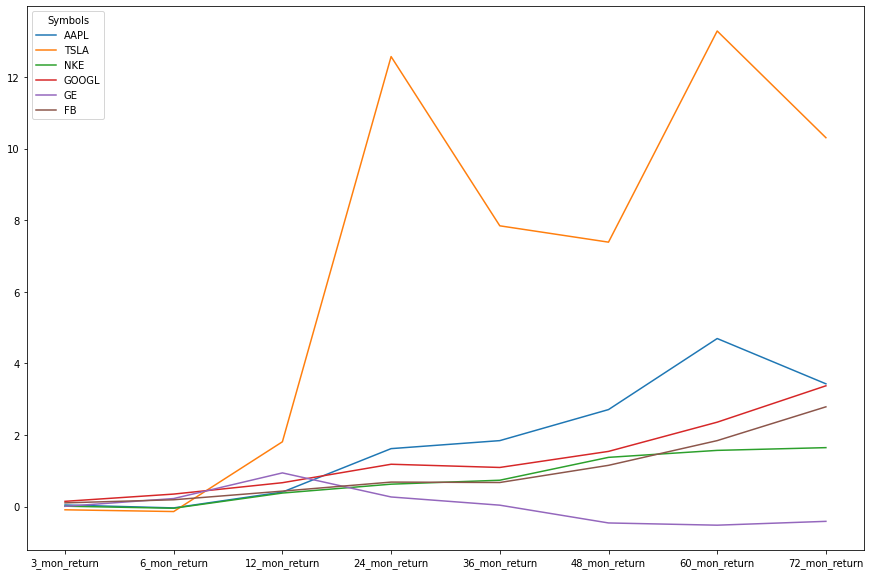

In [43]:
hist_stock_returns.plot(figsize=(15, 10))

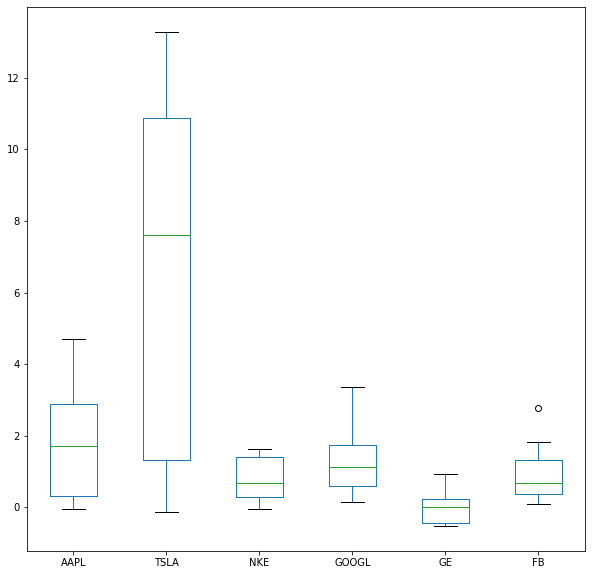

In [44]:
hist_stock_returns.plot.box(figsize=(10, 10))

# Task #3:
Define **Gene** (Scalar): A fraction of the total capital assigned to a stock. Lets address them as weights.

    Gene can be a fractional value between 0 to 1, such as 0.32 of APPL or 0.21 of TSLA  etc.

In [16]:
gene = np.random.rand()
gene

0.4513734059311957

In [45]:
import time
def gen_mc_grid(rows, cols, n, N):  # , xfname): generate monte carlo wind farm layout grids
        np.random.seed(seed=int(time.time()))  # init random seed
        layouts = np.zeros((n, rows * cols), dtype=np.int32)  # one row is a layout
        # layouts_cr = np.zeros((n*, 2), dtype=np.float32)  # layouts column row index
        positionX = np.random.randint(0, cols, size=(N * n * 2))
        positionY = np.random.randint(0, rows, size=(N * n * 2))
        ind_rows = 0  # index of layouts from 0 to n-1
        ind_pos = 0  # index of positionX, positionY from 0 to N*n*2-1
        # ind_crs = 0
        while ind_rows < n:
            layouts[ind_rows, positionX[ind_pos] + positionY[ind_pos] * cols] = 1
            if np.sum(layouts[ind_rows, :]) == N:
                # for ind in range(rows * cols):
                #     if layouts[ind_rows, ind] == 1:
                #         r_i = np.floor(ind / cols)
                #         c_i = np.floor(ind - r_i * cols)
                #         layouts_cr[ind_crs, 0] = c_i
                #         layouts_cr[ind_crs, 1] = r_i
                #         ind_crs += 1
                ind_rows += 1
            ind_pos += 1
            if ind_pos >= N * n * 2:
                print("Not enough positions")
                break
        # filename = "positions{}by{}by{}N{}.dat".format(rows, cols, n, N)
#         np.savetxt(lofname, layouts, fmt='%d', delimiter="  ")
        # np.savetxt(xfname, layouts_cr, fmt='%d', delimiter="  ")
        return layouts

def gen_mc_grid_with_NA_loc(rows, cols, n, N,NA_loc):  # , xfname): generate monte carlo wind farm layout grids
        np.random.seed(seed=int(time.time()))  # init random seed
        layouts = np.zeros((n, rows * cols), dtype=np.int32)  # one row is a layout, NA loc is 0

        layouts_NA= np.zeros((n, rows * cols), dtype=np.int32)  # one row is a layout, NA loc is 2
        for i in NA_loc:
            layouts_NA[:,i-1]=2

        # layouts_cr = np.zeros((n*, 2), dtype=np.float32)  # layouts column row index
        positionX = np.random.randint(0, cols, size=(N * n * 2))
        positionY = np.random.randint(0, rows, size=(N * n * 2))
        ind_rows = 0  # index of layouts from 0 to n-1
        ind_pos = 0  # index of positionX, positionY from 0 to N*n*2-1
        # ind_crs = 0
        N_count=0
        while ind_rows < n:
            cur_state=layouts_NA[ind_rows, positionX[ind_pos] + positionY[ind_pos] * cols]
            if cur_state!=1 and cur_state!=2:
                layouts[ind_rows, positionX[ind_pos] + positionY[ind_pos] * cols]=1
                layouts_NA[ind_rows, positionX[ind_pos] + positionY[ind_pos] * cols] = 1
                N_count+=1
                if np.sum(layouts[ind_rows, :]) == N:
                    ind_rows += 1
                    N_count=0
            ind_pos += 1
            if ind_pos >= N * n * 2:
                print("Not enough positions")
                break
        # filename = "positions{}by{}by{}N{}.dat".format(rows, cols, n, N)
#         np.savetxt(lofname, layouts, fmt='%d', delimiter="  ")
#         np.savetxt(loNAfname, layouts_NA, fmt='%d', delimiter="  ")
        # np.savetxt(xfname, layouts_cr, fmt='%d', delimiter="  ")
        return layouts,layouts_NA

In [46]:
gen_mc_grid(5, 5, 100, 50)
gen_mc_grid_with_NA_loc(5, 5, 100, 50,range(10))

Not enough positions
Not enough positions


(array([[0, 0, 0, ..., 1, 1, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int32), array([[2, 2, 2, ..., 1, 1, 2],
        [2, 2, 2, ..., 0, 0, 2],
        [2, 2, 2, ..., 0, 0, 2],
        ...,
        [2, 2, 2, ..., 0, 0, 2],
        [2, 2, 2, ..., 0, 0, 2],
        [2, 2, 2, ..., 0, 0, 2]], dtype=int32))

### Tash #4:
Define **Chromosome** (1D Array): Set of genes i.e. fractions of total capital assigned to each stock. Set of weights.

Its a 1d Array of the fractional values of all the stocks such that sum of the array will not be over 1. 
As we have 6 company stocks, we shall generate 6 fractional values (genes) which constitues 1 chromosome.
    
**Why sum should be equal to 1?** As these are fraction of the total capital, we are assuming total capital to be 1 unit.
    
**How to make sure sum =1?** Just generate 6 random numbers and then calculate a factor which is 1 / [sum of random numbers]. Finally multiply each of the random numbers with that factor. The sum will be 1.

In [47]:
def chromosome(n):
    ''' Generates set of random numbers whose sum is equal to 1
        Input: Number of stocks.
        Output: Array of random numbers'''
    ch = np.random.rand(n)
    #print(ch)
    #print(sum(ch))
    return ch/sum(ch)

In [23]:
child=chromosome(numberofStuck)
print(child,sum(child))

1.3492979529011457
[0.29216839 0.25094497 0.0225901  0.2946757  0.11908469 0.02053616] 1.0


### Task #5:

Generate **Initial Population** (2D Array): A set of randomly generated chromosomes

In [50]:
n = numberofStuck # Number of stocks = 6 # we must change if we wanted to change 
pop_size=100 # initial population = 100

population = np.array([chromosome(n) for _ in range(pop_size)])
print(population.shape)
print("--")
#population
tempDataframe = pd.DataFrame(population)
tempDataframe

(100, 6)
--


,0,1,2,3,4,5
0,0.223841,0.099327,0.185052,0.237833,0.053996,0.199951
1,0.230549,0.421717,0.031339,0.175037,0.037624,0.103734
2,0.310912,0.194642,0.107121,0.154442,0.134210,0.098673
3,0.228118,0.142015,0.238406,0.159030,0.222465,0.009967
4,0.047794,0.242398,0.159256,0.217845,0.189217,0.143490
...,...,...,...,...,...,...
95,0.231022,0.256108,0.096879,0.100538,0.185817,0.129636
96,0.175776,0.216227,0.270588,0.074198,0.142572,0.120639
97,0.017772,0.253943,0.286872,0.171806,0.020865,0.248743
98,0.187220,0.233463,0.246898,0.140344,0.031970,0.160105


### Task #6:

**Fitness function** (Define a Function): 
The Sharpe ratio, S, is a measure for quantifying the performance (Fitness) of the portfolio and is computed as
follows:
                
                S = (µ − r)/σ
    
    Here µ is the return of the portfolio over a specified period or Mean portfolio return, 
         r is the risk-free rate over the same period and 
         σ is the standard deviation of the returns over the specified period or Standard deviation of portfolio return.

      
Mean portfolio return = Mean Return * Fractions of Total Capital (Chromosome).

Risk-free rate = 0.0697 ( as per google)

Standard deviation of portfolio return = (chromosome * Standard deviation)**2 + Covariance * Respective weights in chromosome.

 #### Fitness function Sub Task 1:
 Calculate Mean, Standard deviation and covariance of the Historical stock returns.

In [51]:
# Convert to numeric columns from Object datatypes.
print(hist_stock_returns.info())
cols=hist_stock_returns.columns
hist_stock_returns[cols] = hist_stock_returns[cols].apply(pd.to_numeric, errors='coerce')
print(hist_stock_returns.info())

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, 3_mon_return to 72_mon_return
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   AAPL    8 non-null      object
 1   TSLA    8 non-null      object
 2   NKE     8 non-null      object
 3   GOOGL   8 non-null      object
 4   GE      8 non-null      object
 5   FB      8 non-null      object
dtypes: object(6)
memory usage: 448.0+ bytes
None
<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, 3_mon_return to 72_mon_return
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    8 non-null      float64
 1   TSLA    8 non-null      float64
 2   NKE     8 non-null      float64
 3   GOOGL   8 non-null      float64
 4   GE      8 non-null      float64
 5   FB      8 non-null      float64
dtypes: float64(6)
memory usage: 448.0+ bytes
None


#### Calculate covariance of historical returns

In [52]:
cov_hist_return=hist_stock_returns.cov()

print(cov_hist_return)

# For ease of calculations make covariance of same variable as zero.
for i in range(6):
    cov_hist_return.iloc[i][i]=0
    
cov_hist_return

Symbols      AAPL       TSLA       NKE     GOOGL        GE        FB
Symbols                                                             
AAPL     2.898359   7.982802  1.099197  1.616758 -0.625699  1.341569
TSLA     7.982802  29.908409  2.946747  4.448205 -1.396922  3.464903
NKE      1.099197   2.946747  0.455871  0.675635 -0.236152  0.565068
GOOGL    1.616758   4.448205  0.675635  1.165499 -0.339398  0.986732
GE      -0.625699  -1.396922 -0.236152 -0.339398  0.236872 -0.294746
FB       1.341569   3.464903  0.565068  0.986732 -0.294746  0.844548


Symbols,AAPL,TSLA,NKE,GOOGL,GE,FB
Symbols,,,,,,
AAPL,0.000000,7.982802,1.099197,1.616758,-0.625699,1.341569
TSLA,7.982802,0.000000,2.946747,4.448205,-1.396922,3.464903
NKE,1.099197,2.946747,0.000000,0.675635,-0.236152,0.565068
GOOGL,1.616758,4.448205,0.675635,0.000000,-0.339398,0.986732
GE,-0.625699,-1.396922,-0.236152,-0.339398,0.000000,-0.294746
FB,1.341569,3.464903,0.565068,0.986732,-0.294746,0.000000


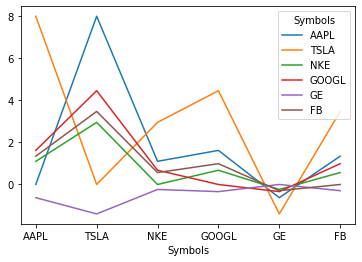

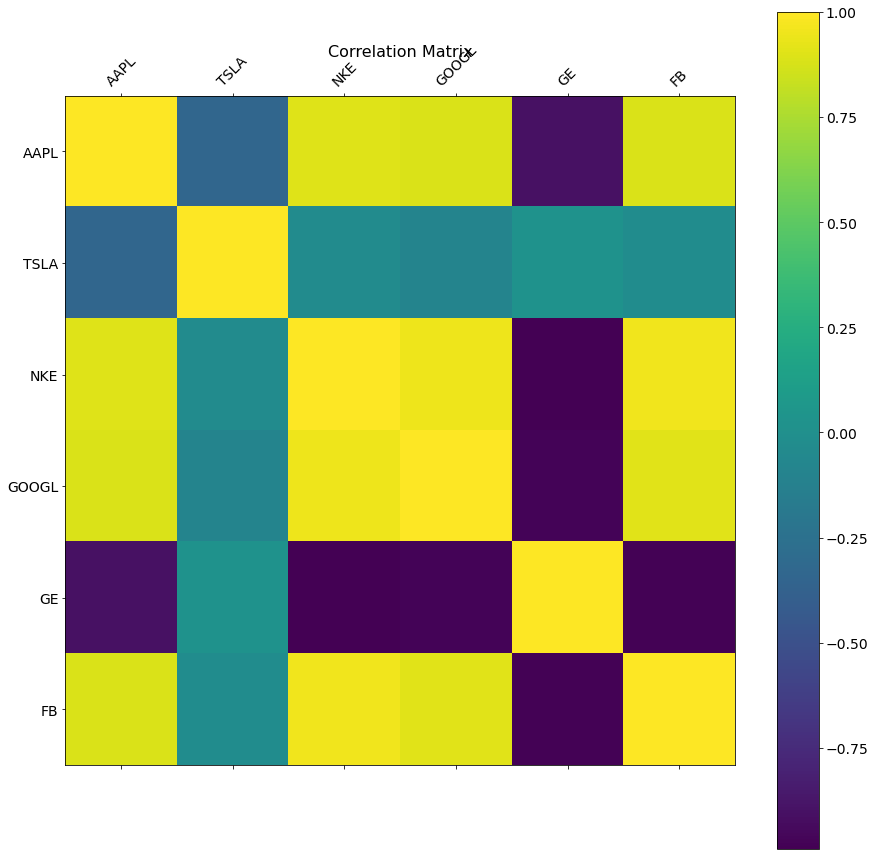

In [53]:
cov_hist_return.plot()

import matplotlib.pyplot as plt

f = plt.figure(figsize=(15, 15))
plt.matshow(cov_hist_return.corr(), fignum=f.number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

# Calculate the mean of historical returns

In [54]:
mean_hist_return=hist_stock_returns.mean()
mean_hist_return

Symbols
AAPL     1.836473
TSLA     6.619838
NKE      0.784970
GOOGL    1.336982
GE       0.009211
FB       0.981073
dtype: float64

# Calculate Standard deviation of historical returns:

In [56]:
sd_hist_return=hist_stock_returns.std()
sd_hist_return

Symbols
AAPL     1.702457
TSLA     5.468858
NKE      0.675182
GOOGL    1.079583
GE       0.486695
FB       0.918993
dtype: float64

#### Fitness function Sub Task 2:
 Calculate Expected portfolio return and portfolio variance.

#### Calculate Expected returns of portfolio.

In [57]:
def mean_portfolio_return(child):
    return np.sum(np.multiply(child,mean_hist_return))

In [59]:
mean_portfolio_return(population[0])

1.7285105588752248

## Calculate portfolio variance.
The variance is the average squared deviation from the mean. The sample variance is denoted by s2, it is an unbiased estimator of the population variance.

In [63]:
def var_portfolio_return(child):
    part_1 = np.sum(np.multiply(child,sd_hist_return)**2)
    temp_lst=[]
    for i in range(6):
        for j in range(6):
            temp=cov_hist_return.iloc[i][j] * child[i] * child[j]
            temp_lst.append(temp)
    part_2=np.sum(temp_lst)
    return part_1+part_2

In [64]:
var_portfolio_return(population[0])

1.895898382424396

#### Risk free factor.

In [65]:
rf= 0.0436 
# 10 Year Treasury Rate is at 1.63%, compared to 1.63% the previous market day and 0.68% last year. This is lower than the long term average of 4.36%. https://ycharts.com/indicators/10_year_treasury_rate

#### Fitness Function of a portfolio.

In [66]:
def fitness_fuction(child):
    print(child)
    ''' This will return the Sharpe ratio for a particular portfolio.
        Input: A child/chromosome (1D Array)
        Output: Sharpe Ratio value (Scalar)'''
    return (mean_portfolio_return(child)-rf)/np.sqrt(var_portfolio_return(child))

In [68]:
fitness_fuction(population[5])

[0.07511499 0.26371796 0.27076965 0.25944934 0.10053309 0.03041496]


1.2582605305877799

### Task #7:
Select **Elite Population** (Define a Function): It filters the elite chromosomes which have highest returns, which were calculated in fitness function.

In [69]:
def Select_elite_population(population, frac=0.3):
    ''' Select elite population from the total population based on fitness function values.
        Input: Population and fraction of population to be considered as elite.
        Output: Elite population.'''
    population = sorted(population,key = lambda x: fitness_fuction(x),reverse=True)
    percentage_elite_idx = int(np.floor(len(population)* frac))
    return population[:percentage_elite_idx]

In [70]:
print(len(Select_elite_population(population, frac=0.3)))
Select_elite_population(population, frac=0.3)

[0.22384143 0.09932711 0.1850517  0.23783286 0.05399568 0.19995121]
[0.23054944 0.42171707 0.03133862 0.17503655 0.03762398 0.10373434]
[0.31091208 0.19464232 0.1071208  0.1544419  0.13420953 0.09867338]
[0.22811848 0.14201476 0.23840563 0.15902973 0.22246457 0.00996683]
[0.04779404 0.24239765 0.15925619 0.21784496 0.18921747 0.14348968]
[0.07511499 0.26371796 0.27076965 0.25944934 0.10053309 0.03041496]
[0.16255327 0.3686602  0.00936007 0.0615968  0.03428542 0.36354424]
[0.18412955 0.06519542 0.27365553 0.23884084 0.05047141 0.18770725]
[0.11350011 0.20627969 0.19769779 0.04521142 0.20196928 0.2353417 ]
[0.03938837 0.14183829 0.25176278 0.20720857 0.12223666 0.23756532]
[0.15260069 0.0448365  0.23972739 0.21226025 0.12891442 0.22166076]
[0.22694    0.25660667 0.08984835 0.35700015 0.06736014 0.00224468]
[0.19195822 0.2209626  0.09265272 0.20698814 0.22086695 0.06657137]
[0.09349386 0.23976143 0.1721983  0.23089638 0.0815582  0.18209183]
[0.00061599 0.23321744 0.21318364 0.22936377 0.2

[array([0.02183497, 0.21045155, 0.12756607, 0.27850013, 0.35755291,
        0.00409437]),
 array([0.20190537, 0.12521389, 0.19121594, 0.08589417, 0.37692815,
        0.01884247]),
 array([0.0216853 , 0.21313281, 0.01709106, 0.13015191, 0.35735614,
        0.26058278]),
 array([0.04617502, 0.17862033, 0.37614136, 0.03550495, 0.35674497,
        0.00681338]),
 array([0.13640718, 0.14182716, 0.14479482, 0.11566077, 0.3110379 ,
        0.15027218]),
 array([0.15149673, 0.07845107, 0.20811107, 0.04307465, 0.29163144,
        0.22723505]),
 array([0.19915901, 0.05583644, 0.18709391, 0.26915862, 0.25547231,
        0.03327971]),
 array([0.00061599, 0.23321744, 0.21318364, 0.22936377, 0.2707967 ,
        0.05282246]),
 array([0.09723439, 0.17576349, 0.19688461, 0.29882401, 0.20759296,
        0.02370055]),
 array([0.02038262, 0.21828237, 0.10889353, 0.15798117, 0.24308062,
        0.25137968]),
 array([0.04671544, 0.15583063, 0.36566767, 0.22982222, 0.18158011,
        0.02038394]),
 array([0.

In [71]:
[fitness_fuction(x) for x in population][:3]

[0.22384143 0.09932711 0.1850517  0.23783286 0.05399568 0.19995121]
[0.23054944 0.42171707 0.03133862 0.17503655 0.03762398 0.10373434]
[0.31091208 0.19464232 0.1071208  0.1544419  0.13420953 0.09867338]
[0.22811848 0.14201476 0.23840563 0.15902973 0.22246457 0.00996683]
[0.04779404 0.24239765 0.15925619 0.21784496 0.18921747 0.14348968]
[0.07511499 0.26371796 0.27076965 0.25944934 0.10053309 0.03041496]
[0.16255327 0.3686602  0.00936007 0.0615968  0.03428542 0.36354424]
[0.18412955 0.06519542 0.27365553 0.23884084 0.05047141 0.18770725]
[0.11350011 0.20627969 0.19769779 0.04521142 0.20196928 0.2353417 ]
[0.03938837 0.14183829 0.25176278 0.20720857 0.12223666 0.23756532]
[0.15260069 0.0448365  0.23972739 0.21226025 0.12891442 0.22166076]
[0.22694    0.25660667 0.08984835 0.35700015 0.06736014 0.00224468]
[0.19195822 0.2209626  0.09265272 0.20698814 0.22086695 0.06657137]
[0.09349386 0.23976143 0.1721983  0.23089638 0.0815582  0.18209183]
[0.00061599 0.23321744 0.21318364 0.22936377 0.2

[1.223684119273676, 1.2257851749831, 1.2382285257999084]

### Task #8:
**Mutation**: A function that will perform mutation in a chromosome. 
            
    Randomly choose 2 numbers between [0, 5] and those elements should be swapped.


In [72]:
def mutation(parent):
    ''' Randomy choosen elements of a chromosome are swapped
        Input: Parent
        Output: Offspring (1D Array)'''
    child=parent.copy()
    n=np.random.choice(range(6),2)
    while (n[0]==n[1]):
        n=np.random.choice(range(6),2)
    child[n[0]],child[n[1]]=child[n[1]],child[n[0]]
    return child

In [73]:
mutation(population[1]),population[1]

(array([0.23054944, 0.10373434, 0.03133862, 0.17503655, 0.03762398,
        0.42171707]),
 array([0.23054944, 0.42171707, 0.03133862, 0.17503655, 0.03762398,
        0.10373434]))

### Task #9:
Crossover: **Heuristic crossover** or **Blend Crossover** uses the ﬁtness values of two parent chromosomes to ascertain the direction of the search. It moves from worst parent to best parent. 

The oﬀspring are created according to the equation:
            
            Off_spring A = Best Parent  + β ∗ ( Best Parent − Worst Parent)
            Off_spring B = Worst Parent - β ∗ ( Best Parent − Worst Parent)
                Where β is a random number between 0 and 1.
This crossover type is good for real-valued genomes.

In [74]:
def Heuristic_crossover(parent1,parent2):
    ''' The oﬀsprings are created according to the equation:
            Off_spring A = Best Parent  + β ∗ ( Best Parent − Worst Parent)
            Off_spring B = Worst Parent - β ∗ ( Best Parent − Worst Parent)
                Where β is a random number between 0 and 1.
        Input: 2 Parents
        Output: 2 Children (1d Array)'''
    ff1=fitness_fuction(parent1)
    ff2=fitness_fuction(parent2)
    diff=parent1 - parent2
    beta=np.random.rand()
    if ff1>ff2:
        child1=parent1 + beta * diff
        child2=parent2 - beta * diff
    else:
        child2=parent1 + beta * diff
        child1=parent2 - beta * diff
    return child1,child2

In [75]:
def Arithmetic_crossover(parent1,parent2):
    ''' The oﬀsprings are created according to the equation:
            Off spring A = α ∗ Parent1 + (1 −α) ∗ Parent2
            Off spring B = (1 −α) ∗ Parent1 + α ∗ Parent2
            
                Where α is a random number between 0 and 1.
        Input: 2 Parents
        Output: 2 Children (1d Array)'''
    alpha = np.random.rand()
    child1 = alpha * parent1 + (1-alpha) * parent2
    child2 = (1-alpha) * parent1 + alpha * parent2
    return child1,child2

In [76]:
for i in population[:30]:
    for j in population[:30]:
        print(Arithmetic_crossover(i,j))

(array([0.22384143, 0.09932711, 0.1850517 , 0.23783286, 0.05399568,
       0.19995121]), array([0.22384143, 0.09932711, 0.1850517 , 0.23783286, 0.05399568,
       0.19995121]))
(array([0.22502873, 0.15638916, 0.15784495, 0.22671811, 0.05109794,
       0.18292112]), array([0.22936215, 0.36465502, 0.05854537, 0.18615131, 0.04052172,
       0.12076443]))
(array([0.28519349, 0.16648849, 0.13013972, 0.1790736 , 0.11051628,
       0.12858842]), array([0.24956001, 0.12748094, 0.16203278, 0.21320117, 0.07768893,
       0.17003617]))
(array([0.22441964, 0.10509799, 0.19226454, 0.22717959, 0.07677072,
       0.17426752]), array([0.22754027, 0.13624388, 0.2311928 , 0.169683  , 0.19968952,
       0.03565052]))
(array([0.20013138, 0.11859584, 0.18157757, 0.23514089, 0.07220734,
       0.19234698]), array([0.0715041 , 0.22312892, 0.16273033, 0.22053693, 0.17100581,
       0.15109391]))
(array([0.11736528, 0.21701771, 0.24641885, 0.25330852, 0.08731271,
       0.07857692]), array([0.18159114, 0.14602

In [77]:
Arithmetic_crossover(population[2],population[3])

(array([0.23002039, 0.1432237 , 0.2353898 , 0.15892434, 0.2204372 ,
        0.01200456]),
 array([0.30901017, 0.19343337, 0.11013663, 0.15454729, 0.13623689,
        0.09663564]))

### Task#10:
**Next Generation**: A function which does mutation,mating or crossover based on a probability and builds a new generation of chromosomes.

In [78]:
def next_generation(pop_size,elite,crossover=Heuristic_crossover):
    ''' Generates new population from elite population with mutation probability as 0.4 and crossover as 0.6. 
        Over the final stages, mutation probability is decreased to 0.1.
        Input: Population Size and elite population.
        Output: Next generation population (2D Array).'''
    new_population=[]
    elite_range=range(len(elite))
    #print(elite_range)
    while len(new_population) < pop_size:
        if len(new_population) > 2*pop_size/3: # In the final stages mutation frequency is decreased.
            mutate_or_crossover = np.random.choice([0, 1], p=[0.9, 0.1])
        else:
            mutate_or_crossover = np.random.choice([0, 1], p=[0.4, 0.6])
        #print(mutate_or_crossover)
        if mutate_or_crossover:
            indx=np.random.choice(elite_range)
            new_population.append(mutation(elite[indx]))
        else:
            p1_idx,p2_idx=np.random.choice(elite_range,2)
            c1,c2=crossover(elite[p1_idx],elite[p2_idx])
            chk=0
            for gene in range(6):
                if c1[gene]<0:
                    chk+=1
                else:
                    chk+=0
            #if sum(chk)>0:
            if chk > 0:
                p1_idx,p2_idx=np.random.choice(elite_range,2)
                c1,c2=crossover(elite[p1_idx],elite[p2_idx])
            new_population.extend([c1,c2])
    return new_population

In [79]:
elite=Select_elite_population(population)
next_generation(100,elite)[:3]

[0.22384143 0.09932711 0.1850517  0.23783286 0.05399568 0.19995121]
[0.23054944 0.42171707 0.03133862 0.17503655 0.03762398 0.10373434]
[0.31091208 0.19464232 0.1071208  0.1544419  0.13420953 0.09867338]
[0.22811848 0.14201476 0.23840563 0.15902973 0.22246457 0.00996683]
[0.04779404 0.24239765 0.15925619 0.21784496 0.18921747 0.14348968]
[0.07511499 0.26371796 0.27076965 0.25944934 0.10053309 0.03041496]
[0.16255327 0.3686602  0.00936007 0.0615968  0.03428542 0.36354424]
[0.18412955 0.06519542 0.27365553 0.23884084 0.05047141 0.18770725]
[0.11350011 0.20627969 0.19769779 0.04521142 0.20196928 0.2353417 ]
[0.03938837 0.14183829 0.25176278 0.20720857 0.12223666 0.23756532]
[0.15260069 0.0448365  0.23972739 0.21226025 0.12891442 0.22166076]
[0.22694    0.25660667 0.08984835 0.35700015 0.06736014 0.00224468]
[0.19195822 0.2209626  0.09265272 0.20698814 0.22086695 0.06657137]
[0.09349386 0.23976143 0.1721983  0.23089638 0.0815582  0.18209183]
[0.00061599 0.23321744 0.21318364 0.22936377 0.2

[array([0.10724524, 0.17776617, 0.13783286, 0.13926011, 0.31530538,
        0.12259024]),
 array([ 0.25380184, -0.00284937,  0.17282097,  0.02065897,  0.29385866,
         0.26170892]),
 array([0.22982222, 0.15583063, 0.36566767, 0.04671544, 0.18158011,
        0.02038394])]

In [80]:
elite=Select_elite_population(population)
next_generation(100,elite,Arithmetic_crossover)[:3]

[0.22384143 0.09932711 0.1850517  0.23783286 0.05399568 0.19995121]
[0.23054944 0.42171707 0.03133862 0.17503655 0.03762398 0.10373434]
[0.31091208 0.19464232 0.1071208  0.1544419  0.13420953 0.09867338]
[0.22811848 0.14201476 0.23840563 0.15902973 0.22246457 0.00996683]
[0.04779404 0.24239765 0.15925619 0.21784496 0.18921747 0.14348968]
[0.07511499 0.26371796 0.27076965 0.25944934 0.10053309 0.03041496]
[0.16255327 0.3686602  0.00936007 0.0615968  0.03428542 0.36354424]
[0.18412955 0.06519542 0.27365553 0.23884084 0.05047141 0.18770725]
[0.11350011 0.20627969 0.19769779 0.04521142 0.20196928 0.2353417 ]
[0.03938837 0.14183829 0.25176278 0.20720857 0.12223666 0.23756532]
[0.15260069 0.0448365  0.23972739 0.21226025 0.12891442 0.22166076]
[0.22694    0.25660667 0.08984835 0.35700015 0.06736014 0.00224468]
[0.19195822 0.2209626  0.09265272 0.20698814 0.22086695 0.06657137]
[0.09349386 0.23976143 0.1721983  0.23089638 0.0815582  0.18209183]
[0.00061599 0.23321744 0.21318364 0.22936377 0.2

[array([0.04671544, 0.15583063, 0.18158011, 0.22982222, 0.36566767,
        0.02038394]),
 array([0.00361485, 0.19794029, 0.05649726, 0.29721757, 0.17006091,
        0.27466911]),
 array([0.04671544, 0.15583063, 0.22982222, 0.36566767, 0.18158011,
        0.02038394])]

### Task #11:
**Iterate the process**: Iterate the whole process till their is no change in maximum returns/min risk or for fixed number of iterations. 

## With Heuristic crossover:

In [83]:
n= numberofStuck # Number of stocks = 6
pop_size=100 # initial population = 100
numberofiteration = 20

# Initial population
population = np.array([chromosome(n) for _ in range(pop_size)])

# Get initial elite population
elite = Select_elite_population(population)

iteration=0 
Expected_returns=0
Expected_risk=1

while ((numberofiteration >= iteration) or (Expected_returns < 1.3 and Expected_risk > 0.007)) :
    population = next_generation(100,elite) # generate collection of next generation
    elite = Select_elite_population(population) # select eliet population.
    Expected_returns=mean_portfolio_return(elite[0])
    Expected_risk=var_portfolio_return(elite[0])
    print('Iteration:',iteration)
    print(f'Expected_returns : {Expected_returns} and Expected_risk {Expected_risk}')
    iteration+=1


print('Portfolio of stocks after all the iterations:\n')
[print(hist_stock_returns.columns[i],':',elite[0][i]) for i in list(range(numberofStuck))]
print(hist_stock_returns.shape)

Streaming output truncated to the last 5000 lines.
[0.04307002 0.13232805 0.28449415 0.09106684 0.27974776 0.16929319]
[0.06961058 0.09268414 0.10038627 0.10975984 0.37100035 0.25655882]
[0.0854224  0.06626683 0.11327109 0.10109182 0.37425364 0.25969421]
[0.0231397  0.0552406  0.13231396 0.37890035 0.26177816 0.14862723]
[0.04263179 0.05924354 0.15246903 0.34762666 0.27009641 0.12793258]
[0.03850538 0.03753442 0.14300858 0.37380919 0.28866976 0.11847268]
[0.05068275 0.12574819 0.08530873 0.32294866 0.30662744 0.10868423]
[-0.19937486  0.29835569  0.06014451  0.05327005  0.46989022  0.31771439]
[ 0.09772361 -0.01993665  0.25224788  0.21317456  0.3775669   0.07922369]
[0.04307002 0.13232805 0.28449415 0.09106684 0.27974776 0.16929319]
[0.11707205 0.01462654 0.26468458 0.19480546 0.36282423 0.04598713]
[0.04307002 0.13232805 0.28449415 0.09106684 0.27974776 0.16929319]
[0.03850538 0.03753442 0.14300858 0.37380919 0.28866976 0.11847268]
[ 0.00691356  0.10395605  0.22848841 -0.0832244   0.3

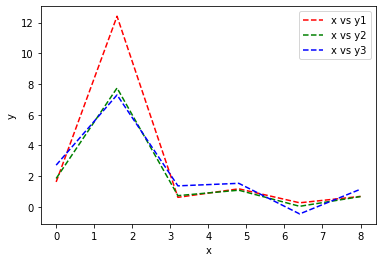

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(0,8,6)
y = hist_stock_returns
a=hist_stock_returns.copy()

plt.plot(x,a[3:4].T,'r--',label="x vs y1") #CONTAINS YOUR 3RD ROW
plt.plot(x,a[4:5].T,'g--',label="x vs y2") #CONTAINS YOUR 4TH ROW
plt.plot(x,a[5:6].T,'b--',label="x vs y3") #CONTAINS YOUR 5TH ROW
plt.legend(loc='best')
plt.xlabel("x")
plt.ylabel("y")
plt.show()

### Weights and their respective returns:

In [55]:
print('Portfolio of stocks after all the iterations:\n')
[print(hist_stock_returns.columns[i],':',elite[0][i]) for i in list(range(6))]

print('\nExpected returns of {} with risk of {}\n'.format(Expected_returns,Expected_risk))
#elite

Portfolio of stocks after all the iterations:

AAPL : 0.039196470930018046
TSLA : 0.008464413538141778
NKE : 0.30149285730498454
GOOGL : 0.14859122255742485
GE : 0.47419003833833173
FB : 0.028064997331099253

Expected returns of 0.5952447324430197 with risk of 0.12928941687053505



Although heuristic method works well, it gives negative returns which is not expected.

In [56]:
fitness_fuction(elite[5])

[0.09353338 0.05686599 0.16484822 0.21838032 0.36954701 0.09682507]


1.3874029142499018

## BEST Approach using Arithmetic crossover:

In [59]:
n = numberofStuck # Number of stocks = 6 we can change it from start of the program
pop_size=100 # initial population = 100

# Initial population
population = np.array([chromosome(n) for _ in range(pop_size)])

# Get initial elite population
elite = Select_elite_population(population)

iteration=0 
Expected_returns=0
Expected_risk=1

while ((numberofiteration >= iteration) and (Expected_returns < 0.50 and Expected_risk > 0.005)) :
    print('Iteration:',iteration)
    population = next_generation(100,elite,Arithmetic_crossover)
    elite = Select_elite_population(population)
    Expected_returns=mean_portfolio_return(elite[0])
    Expected_risk=var_portfolio_return(elite[0])
    print('Expected returns of {} with risk of {}\n'.format(Expected_returns,Expected_risk))
    iteration+=1


print('Portfolio of stocks after all the iterations:\n')
[print(hist_stock_returns.columns[i],':',elite[0][i]) for i in list(range(6))]

[0.80432454 0.84813404 0.40048886 0.29992402 0.17473025 0.62061595]
3.1482176557251726
[0.56105789 0.39304811 0.34347072 0.9072222  0.58470332 0.26713849]
3.0566407288411734
[0.04630976 0.32338974 0.72525369 0.55746406 0.77985123 0.58119004]
3.0134585267310223
[0.72650218 0.87377273 0.67552627 0.76010682 0.45198398 0.00897932]
3.496871305761718
[0.61635756 0.2450466  0.18176938 0.78554639 0.61759262 0.93375797]
3.3800705137591422
[0.96162376 0.21325988 0.91272584 0.76362311 0.50247725 0.33686621]
3.690576049664271
[0.57379532 0.29156428 0.17394807 0.85942708 0.63517734 0.03557984]
2.569491914671577
[0.88997533 0.23797794 0.39098099 0.56320428 0.40118414 0.30455939]
2.7878820681069034
[0.87762985 0.85698321 0.77800106 0.90730878 0.43388592 0.25650011]
4.110308942357667
[0.7848078  0.51629765 0.87373221 0.83278323 0.96093182 0.26871638]
4.237269085329283
[0.74145509 0.19114214 0.55407671 0.74298216 0.37881126 0.95077697]
3.5592443264943907
[0.3564561  0.46247835 0.9530483  0.08659368 0.2

[None, None, None, None, None, None]

In [60]:
print('Portfolio of stocks after all the iterations:\n')
[print(hist_stock_returns.columns[i],':',elite[0][i]) for i in list(range(6))]

print('\nExpected returns of {} with risk of {}\n'.format(Expected_returns,Expected_risk))

Portfolio of stocks after all the iterations:

AAPL : 0.08327452789193932
TSLA : 0.05953834167678979
NKE : 0.06179129381419392
GOOGL : 0.19845367491948898
GE : 0.4801580560747694
FB : 0.11678410562281856

Expected returns of 0.9798955145946895 with risk of 0.413680014886667

